In [47]:
objects = [ 
{'x':0, 'y':0, 'width':800, 'height':800 ,'className':'Rect'},
 {'x':800, 'y':700, 'radiusX':200, 'radiusY':300, 'className':'Ellipse'},
#     {'x':500, 'y':500, 'radiusX':200, 'radiusY':200, 'className':'Ellipse'},
#  {'x':40, 'y':40, 'width':100, 'height':100, 'className':'Rect'}
]

In [51]:
for o in objects:
    print(o)

{'x': 0, 'y': 0, 'width': 800, 'height': 800, 'className': 'Rect'}
{'x': 800, 'y': 700, 'radiusX': 200, 'radiusY': 300, 'className': 'Ellipse'}


In [5]:
from PIL import Image, ImageDraw
import numpy as np


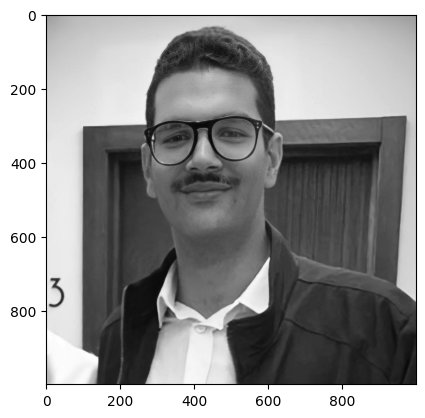

In [6]:
import matplotlib.pyplot as plt
id =1
img = Image.open('/home/ibrahim/Downloads/photo1669141192.jpeg').convert('L')
img = img.resize((1000,1000))
plt.imshow(img, cmap='gray')

In [7]:
mahmoud_fft = np.fft.fftshift(np.fft.fft2(img))
mahmoud_fft_amp = np.sqrt(np.real(mahmoud_fft) ** 2 + np.imag(mahmoud_fft) ** 2)
mahmoud_fft_phase = np.arctan2(np.imag(mahmoud_fft), np.real(mahmoud_fft))
mahmoud_fft_amp.shape

(1000, 1000)

In [8]:
# array_or = np.zeros((1000,1000))
# array_and = np.ones((1000,1000))
# for shape in objects:
#     refactored_indices = (shape['x'], shape['y'], shape['x_end'], shape['y_end'])
#     img_mask = Image.new("L", (1000,1000))
#     img_draw = ImageDraw.Draw(img_mask)
#     if shape['className'] == 'Ellipse':
#         img_draw.ellipse(refactored_indices, fill=1)
#     else:
#         img_draw.rounded_rectangle(refactored_indices, 0, fill=1)
#     img.putalpha(img_mask)
#
#     array_or = np.logical_or(array_or, np.array(img)[:, :, 1])
#     array_and = np.logical_and(array_and, np.array(img)[:, :, 1])
#     array_xor = np.logical_not(array_or)
#     print(array_or)
#     arr_cropped = mahmoud_fft_phase * array_or
#
# plt.imshow(arr_cropped, cmap='gray')

In [9]:
def crop_img(arr, img, shapes, mode='all'):

    for shape in shapes:
        img_copy = img.copy()
        img_mask = Image.new("L", img_copy.size)
        img_draw = ImageDraw.Draw(img_mask)
        
        if shape['className'] == 'Ellipse':
            img_draw.ellipse(((shape['x']-shape['radiusX']), (shape['y']-shape['radiusY']), (shape['x']+shape['radiusX']), (shape['y']+shape['radiusY'])), fill=1)
        else:
            img_draw.rounded_rectangle((shape['x'], shape['y'], shape['width'], shape['height']), 0, fill=1)
        img_copy.putalpha(img_mask)
        
        if mode == 'intersect':
            arr_final = np.logical_and(np.ones(img_copy.size), np.array(img_copy)[:, :, 1])
            arr_cropped = arr * arr_final
        elif mode == 'difference':
            arr_final = np.logical_not(np.logical_or(np.zeros(img_copy.size), np.array(img_copy)[:, :, 1]))
            arr_cropped = arr * arr_final
        else:
            print('adham')
            arr_final = np.logical_or(np.zeros(img_copy.size), np.array(img_copy)[:, :, 1])
            arr_cropped = arr * arr_final
    
    return arr_cropped

adham
adham


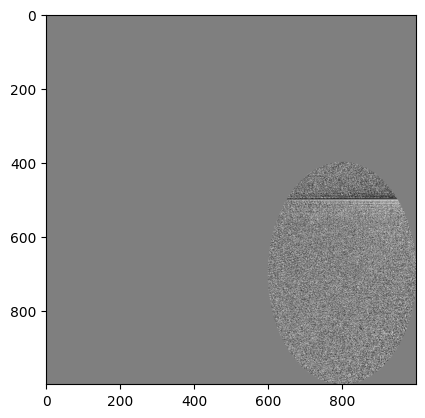

In [48]:
plt.imshow(crop_img(mahmoud_fft_phase, img, objects, mode='all'), cmap='gray')

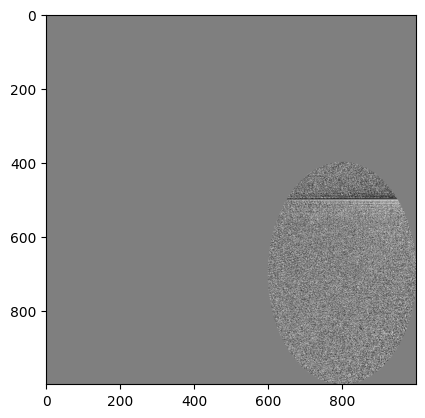

In [49]:
plt.imshow(crop_img(mahmoud_fft_phase, img, objects, mode='intersect'), cmap='gray')

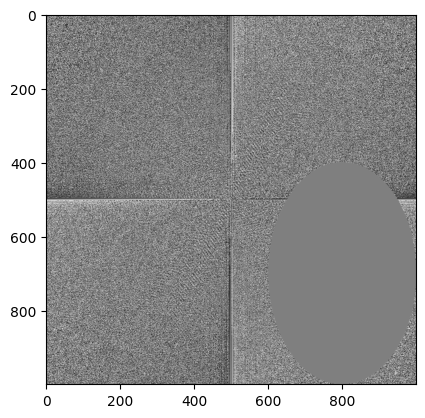

In [50]:
-uplt.imshow(crop_img(mahmoud_fft_phase, img, objects, mode='difference'), cmap='gray')